In [40]:
#|default_exp app


#import fastbook
#fastbook.setup_book()
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath


In [41]:
#|export
from fastai.vision.all import *
import gradio as gr
import fastbook
from fastbook import *
from fastai.vision.widgets import *

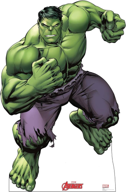

In [42]:
im = PILImage.create('hulk.jpg')
im.thumbnail((192,192))
im

In [11]:
#|export
learn = load_learner('export.pkl')


In [12]:
learn.predict(im)

('Hulk',
 tensor(2),
 tensor([3.9924e-10, 1.4393e-06, 1.0000e+00, 4.8948e-08, 6.0699e-08, 4.1058e-10]))

In [19]:
#|export
categories = ( 'Captain America', 'Hawkeye', 'Hulk', 'Iron Man', 'Natasha Romanoff', 'Thor')

def classify_image(img):
  pred, idx, prob = learn.predict(img)
  return dict(zip(categories, map(float, prob)))

In [20]:
classify_image(im)

{'Captain America': 3.992370600780504e-10,
 'Hawkeye': 1.4393164065040764e-06,
 'Hulk': 0.9999984502792358,
 'Iron Man': 4.894770100349888e-08,
 'Natasha Romanoff': 6.069870295277724e-08,
 'Thor': 4.105759621175764e-10}

In [21]:
#|export
image = gr.Image()
label = gr.Label()
examples = ['hulk.jpg', 'ironman.jpg', 'captainamerica.jpg']

intf = gr.Interface(fn = classify_image, inputs = image, outputs = label, examples = examples)
intf.launch(inline = False)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [48]:
import nbdev

nbdev.export.nb_export('app.ipynb')
print('ok')

ok
